## 1. Import Data & Modules

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import xlrd
import matplotlib.dates as mdates

In [2]:
# Importing data
df_groc_1 = pd.read_fwf('../data/original/saltsnck_groc_1687_1739')
df_groc_2 = pd.read_fwf('../data/original/saltsnck_groc_1635_1686')

### Groceries Dataframe

In [107]:
df_groc_1.head()

,IRI_KEY,WEEK,SY,GE,VEND,ITEM,UNITS,DOLLARS,F,D,PR
0,234212,1687,0,1,84114,11336,5,12.50,NONE,1,0
1,234212,1687,0,1,84114,11391,5,12.50,NONE,0,0
2,234212,1687,0,1,84114,10990,9,22.50,NONE,1,0
3,234212,1687,0,2,84114,10813,5,12.75,NONE,1,1
4,234212,1687,0,1,84114,999,2,5.00,NONE,0,0


In [108]:
# Checking length of dataset
len_groc_1 = len(df_groc_1.index)
print(len_groc_1)

20777520


In [109]:
df_groc_2.head()

,IRI_KEY,WEEK,SY,GE,VEND,ITEM,UNITS,DOLLARS,F,D,PR
0,234212,1635,0,3,78271,2060,6,12.00,NONE,0,1
1,234212,1635,0,3,78271,2061,4,8.79,NONE,0,1
2,234212,1635,0,1,84114,11336,5,15.00,NONE,0,0
3,234212,1635,0,1,84114,11391,4,12.00,NONE,0,0
4,234212,1635,0,1,84114,10990,8,21.96,NONE,0,1


In [110]:
# Checking length of dataset
len_groc_2 = len(df_groc_2.index)
print(len_groc_2)

19636683


In [111]:
df_groc = pd.concat([df_groc_1, df_groc_2], ignore_index=True)

In [112]:
df_groc.head()

,IRI_KEY,WEEK,SY,GE,VEND,ITEM,UNITS,DOLLARS,F,D,PR
0,234212,1687,0,1,84114,11336,5,12.50,NONE,1,0
1,234212,1687,0,1,84114,11391,5,12.50,NONE,0,0
2,234212,1687,0,1,84114,10990,9,22.50,NONE,1,0
3,234212,1687,0,2,84114,10813,5,12.75,NONE,1,1
4,234212,1687,0,1,84114,999,2,5.00,NONE,0,0


In [113]:
# Checking new length of dataset
len_df_groc = len(df_groc.index)
if len_df_groc == (len_groc_1 + len_groc_2):
    print(f"Correctly concatinated: {len_df_groc}")
else:
    print("Please check dataframes")

Correctly concatinated: 40414203


### Attributes and Delivery Dataframe

In [114]:
# Importing data
df_attr = pd.read_fwf('../data/original/saltsnck_prod_attr')
df_stores = pd.read_fwf('../data/original/Delivery_Stores')

In [115]:
df_attr.head()

,SY,GE,VEND,ITEM,VOL_EQ,FLAVOR/SCENT,PACKAGE,PRODUCT TYPE,STORE,LOCATION,...,NUT.1,TYPE OF.14,POPCORN,TYPE OF.15,PREPARATION,TYPE OF.16,TOPPING,TYPE OF TORTILLA,TYPE OF.17,TORTILLA/KIT
0,0,1,2,72107,0.7500,KETTLE CORN,PLASTIC BAG,RTE POPCORN,SHELF,STABLE,...,NaN,MISSING,NaN,MISSING,NaN,MISSING,NaN,MISSING,MISSING,NaN
1,0,1,2,80294,1.0000,SESAME,PLASTIC BAG,PRETZEL,SHELF,STABLE,...,NaN,MISSING,NaN,MISSING,NaN,MISSING,NaN,MISSING,MISSING,NaN
2,0,1,2,80296,0.8500,SESAME,PLASTIC BAG,PRETZEL,SHELF,STABLE,...,NaN,MISSING,NaN,MISSING,NaN,MISSING,NaN,MISSING,MISSING,NaN
3,0,1,2,83302,0.4844,MISSING,BAG,SNACK MIX,SHELF,STABLE,...,NaN,MISSING,NaN,MISSING,NaN,MISSING,NaN,MISSING,MISSING,NaN
4,0,1,9,7436,1.1250,ASSORTED,TIN,RTE POPCORN,SHELF,STABLE,...,NaN,MISSING,NaN,MISSING,NaN,MISSING,NaN,MISSING,MISSING,NaN


In [116]:
df_attr.dtypes

SY                    int64
GE                    int64
VEND                  int64
ITEM                  int64
VOL_EQ              float64
                     ...   
TYPE OF.16           object
TOPPING              object
TYPE OF TORTILLA     object
TYPE OF.17           object
TORTILLA/KIT        float64
Length: 131, dtype: object

In [117]:
df_stores.head()

,IRI_KEY,OU,EST_ACV,Market_Name,Open,Clsd,MskdName
0,200032,GR,25.28099,NEW YORK,1539,1743,Chain5
1,200156,GR,16.52399,DETROIT,1689,1799,Chain44
2,200272,GR,11.09200,LOS ANGELES,873,9998,Chain107
3,200341,GR,25.69398,SAN DIEGO,1197,9998,Chain107
4,200379,GR,29.52299,SOUTH CAROLINA,1348,1719,Chain55


### Products and Week Dataframe

In [118]:
# Importing data
df_prod = pd.read_excel('../data/original/prod_saltsnck.xls')
df_week = pd.read_excel('../data/original/IRI week translation_2008_2017.xls')

In [119]:
df_prod.head()

,L1,L2,L3,L4,L5,L9,Level,UPC,SY,GE,...,ITEM,*STUBSPEC 1431RC 00004,VOL_EQ,PRODUCT TYPE,PACKAGE,FLAVOR/SCENT,FAT CONTENT,COOKING METHOD,SALT/SODIUM CONTENT,TYPE OF CUT
0,CATEGORY - SALTY SNACKS,POTATO CHIPS,ACTON CO INC,ACTON CO INC,GORDONS,+GORDN BBQ PTCHP THN 6OZ,9,00-02-36300-04650,0,2,...,4650,+GORDN BBQ PTCHP THN 6OZ 0 2 3...,0.3750,POTATO CHIP,BAG,BARBECUE,MISSING,MISSING,MISSING,THIN
1,CATEGORY - SALTY SNACKS,POTATO CHIPS,ACTON CO INC,ACTON CO INC,GORDONS,+GORDN ORGL PTCHP FLAT 14.5OZ,9,00-01-36300-04632,0,1,...,4632,+GORDN ORGL PTCHP FLAT 14.5OZ 0 1 3...,0.9063,POTATO CHIP,PLASTIC BAG,ORIGINAL,MISSING,MISSING,MISSING,FLAT
2,CATEGORY - SALTY SNACKS,POTATO CHIPS,ACTON CO INC,ACTON CO INC,GORDONS,+GORDN REDHT PTCHP RPLD 6OZ,9,00-02-36300-04652,0,2,...,4652,+GORDN REDHT PTCHP RPLD 6OZ 0 2 3...,0.3750,POTATO CHIP,BAG,RED HOT,MISSING,MISSING,MISSING,RIPPLED
3,CATEGORY - SALTY SNACKS,POTATO CHIPS,ACTON CO INC,ACTON CO INC,GORDONS,+GORDN REG PTCHP RPLD 6OZ,9,00-03-36300-04641,0,3,...,4641,+GORDN REG PTCHP RPLD 6OZ 0 3 3...,0.3750,POTATO CHIP,BAG,REGULAR,MISSING,MISSING,MISSING,RIPPLED
4,CATEGORY - SALTY SNACKS,POTATO CHIPS,ACTON CO INC,ACTON CO INC,GORDONS,+GORDN REG PTCHP THN 6OZ,9,00-02-36300-04640,0,2,...,4640,+GORDN REG PTCHP THN 6OZ 0 2 3...,0.3750,POTATO CHIP,BAG,REGULAR,MISSING,MISSING,MISSING,THIN


In [120]:
df_prod.dtypes

L1                                                                                   object
L2                                                                                   object
L3                                                                                   object
L4                                                                                   object
L5                                                                                   object
L9                                                                                   object
Level                                                                                 int64
UPC                                                                                  object
SY                                                                                    int64
GE                                                                                    int64
VEND                                                                            

In [121]:
df_week.head()

,IRI Week,Calendar week starting on,Calendar week ending on,Unnamed: 3,Calendar date,IRI Week.1
0,1479,2007-12-31,2008-01-06,NaN,1979-09-03,1.0
1,1480,2008-01-07,2008-01-13,NaN,NaT,NaN
2,1481,2008-01-14,2008-01-20,NaN,NaT,NaN
3,1482,2008-01-21,2008-01-27,NaN,NaT,NaN
4,1483,2008-01-28,2008-02-03,NaN,NaT,NaN


In [122]:
df_week = df_week.drop(columns=["Calendar date","IRI Week.1","Unnamed: 3"], axis=1)

In [123]:
df_week.head()

,IRI Week,Calendar week starting on,Calendar week ending on
0,1479,2007-12-31,2008-01-06
1,1480,2008-01-07,2008-01-13
2,1481,2008-01-14,2008-01-20
3,1482,2008-01-21,2008-01-27
4,1483,2008-01-28,2008-02-03


## 2. Merging Dataframes

### Merging Stores and Groceries Dataframe

In [124]:
# Checking length of dataset
print(len_df_groc)

40414203


In [125]:
df = df_groc.merge(df_stores, on='IRI_KEY', how='left')

In [126]:
# Checking new length of dataset
len_df_s1_before = len(df_groc.index)
len_df_s1_after = len(df.index)
if len_df_s1_before == len_df_s1_after:
    print(f"Correctly concatinated: {len_df_s1_after}")
else:
    print(f"Please check dataframes. Unmatched rows (%): {((len_df_s1_before - len_df_s1_after)/len_df_s1_before):.2f}%")

Correctly concatinated: 40414203


In [127]:
df.head()

,IRI_KEY,WEEK,SY,GE,VEND,ITEM,UNITS,DOLLARS,F,D,PR,OU,EST_ACV,Market_Name,Open,Clsd,MskdName
0,234212,1687,0,1,84114,11336,5,12.50,NONE,1,0,GR,34.04199,CHICAGO,435.0,9998.0,Chain42
1,234212,1687,0,1,84114,11391,5,12.50,NONE,0,0,GR,34.04199,CHICAGO,435.0,9998.0,Chain42
2,234212,1687,0,1,84114,10990,9,22.50,NONE,1,0,GR,34.04199,CHICAGO,435.0,9998.0,Chain42
3,234212,1687,0,2,84114,10813,5,12.75,NONE,1,1,GR,34.04199,CHICAGO,435.0,9998.0,Chain42
4,234212,1687,0,1,84114,999,2,5.00,NONE,0,0,GR,34.04199,CHICAGO,435.0,9998.0,Chain42


In [128]:
df = df.merge(df_week.rename(columns={'IRI Week': 'WEEK'}), on='WEEK', how='left')

In [129]:
# Checking new length of dataset
len_df_s2_after = len(df.index)
if len_df_s1_after == len_df_s2_after:
    print(f"Correctly concatinated: {len_df_s2_after}")
else:
    print(f"Please check dataframes. Unmatched rows (%): {((len_df_s1_after - len_df_s2_after)/len_df_s1_after):.2f}%")

Correctly concatinated: 40414203


In [130]:
df.head()

,IRI_KEY,WEEK,SY,GE,VEND,ITEM,UNITS,DOLLARS,F,D,PR,OU,EST_ACV,Market_Name,Open,Clsd,MskdName,Calendar week starting on,Calendar week ending on
0,234212,1687,0,1,84114,11336,5,12.50,NONE,1,0,GR,34.04199,CHICAGO,435.0,9998.0,Chain42,2011-12-26,2012-01-01
1,234212,1687,0,1,84114,11391,5,12.50,NONE,0,0,GR,34.04199,CHICAGO,435.0,9998.0,Chain42,2011-12-26,2012-01-01
2,234212,1687,0,1,84114,10990,9,22.50,NONE,1,0,GR,34.04199,CHICAGO,435.0,9998.0,Chain42,2011-12-26,2012-01-01
3,234212,1687,0,2,84114,10813,5,12.75,NONE,1,1,GR,34.04199,CHICAGO,435.0,9998.0,Chain42,2011-12-26,2012-01-01
4,234212,1687,0,1,84114,999,2,5.00,NONE,0,0,GR,34.04199,CHICAGO,435.0,9998.0,Chain42,2011-12-26,2012-01-01


In [131]:
df.dtypes

IRI_KEY                               int64
WEEK                                  int64
SY                                    int64
GE                                    int64
VEND                                  int64
ITEM                                  int64
UNITS                                 int64
DOLLARS                             float64
F                                    object
D                                     int64
PR                                    int64
OU                                   object
EST_ACV                             float64
Market_Name                          object
Open                                float64
Clsd                                float64
MskdName                             object
Calendar week starting on    datetime64[ns]
Calendar week ending on      datetime64[ns]
dtype: object

### UPC Creation

In [132]:
# Create a new column that concatenates SY, GE, VEND, and ITEM to create the UPC
df['UPC'] = df['SY'].astype(str).str.zfill(2) + '-' + df['GE'].astype(str).str.zfill(2) + '-' + df['VEND'].astype(str).str.zfill(5) + '-' + df['ITEM'].astype(str).str.zfill(5)

In [133]:
df.dtypes

IRI_KEY                               int64
WEEK                                  int64
SY                                    int64
GE                                    int64
VEND                                  int64
ITEM                                  int64
UNITS                                 int64
DOLLARS                             float64
F                                    object
D                                     int64
PR                                    int64
OU                                   object
EST_ACV                             float64
Market_Name                          object
Open                                float64
Clsd                                float64
MskdName                             object
Calendar week starting on    datetime64[ns]
Calendar week ending on      datetime64[ns]
UPC                                  object
dtype: object

In [134]:
df["UPC"].info

<bound method Series.info of 0           00-01-84114-11336
1           00-01-84114-11391
2           00-01-84114-10990
3           00-02-84114-10813
4           00-01-84114-00999
                  ...        
40414198    07-01-28229-01315
40414199    07-01-20495-39347
40414200    07-01-20495-39313
40414201    07-01-20495-39321
40414202    08-01-29515-30200
Name: UPC, Length: 40414203, dtype: object>

### Merging Main and Product Dataframe

In [135]:
# Function to drop duplicate columns
def drop_duplicate_columns(df1, df2, exclude='UPC'):
    # Get the column names from both dataframes
    df1_columns = set(df1.columns)
    df2_columns = set(df2.columns)

    # Find common columns
    common_columns = df1_columns.intersection(df2_columns)

    # Exclude the specified column from being removed
    if exclude in common_columns:
        common_columns.remove(exclude)

    # Drop common columns from df2
    df2 = df2.drop(columns=common_columns)
    
    return df2

In [136]:
df_prod = drop_duplicate_columns(df, df_prod)

In [137]:
df = pd.merge(df,df_prod, on="UPC", how='left')

In [138]:
# Checking new length of dataset
len_df_s3_after = len(df.index)
if len_df_s3_after == len_df_s2_after:
    print(f"Correctly concatinated: {len_df_s3_after}")
else:
    print(f"Please check dataframes. Unmatched rows (%): {((len_df_s2_after - len_df_s3_after)/len_df_s2_after):.2f}%")

Correctly concatinated: 40414203


In [139]:
df.head()

,IRI_KEY,WEEK,SY,GE,VEND,ITEM,UNITS,DOLLARS,F,D,...,Level,*STUBSPEC 1431RC 00004,VOL_EQ,PRODUCT TYPE,PACKAGE,FLAVOR/SCENT,FAT CONTENT,COOKING METHOD,SALT/SODIUM CONTENT,TYPE OF CUT
0,234212,1687,0,1,84114,11336,5,12.50,NONE,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,234212,1687,0,1,84114,11391,5,12.50,NONE,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,234212,1687,0,1,84114,10990,9,22.50,NONE,1,...,9.0,+KLBKS HHNBR PTCHP FLAT 4OZ 0 1 8...,0.2500,POTATO CHIP,BAG,MISSING,MISSING,BAKED,MISSING,FLAT
3,234212,1687,0,2,84114,10813,5,12.75,NONE,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,234212,1687,0,1,84114,999,2,5.00,NONE,0,...,9.0,+KTLCP REG PTCHP FLAT 5OZ 0 1 8...,0.3125,POTATO CHIP,BAG,REGULAR,MISSING,KETTLE COOKED,UNSALTED,FLAT


In [140]:
df_groc.dtypes

IRI_KEY      int64
WEEK         int64
SY           int64
GE           int64
VEND         int64
ITEM         int64
UNITS        int64
DOLLARS    float64
F           object
D            int64
PR           int64
dtype: object

In [141]:
df = df.drop(columns=["EST_ACV","Open","Clsd","L1","L2","L4","L5","SY","GE","Level","OU"], axis=1)

In [142]:
# Export to CSV
df.to_csv('../data/output/df.csv', index=False)

## 3. Analysis and Visualization

In [143]:
# Filter for pepsico
pepsico_df = df[(df['L3'] == 'PEPSICO INC')]

# Export to CSV
pepsico_df.to_csv('../data/output/pepsico_df.csv', index=False)

### For Pepsico in 2011, the total volume was 10,4m units with 15.5m $ in revenue. The top three markets are located at the coasts of the US: New York, Los Angeles, and Boston.

Total Volume: 280816
Total Revenue: 416091.0


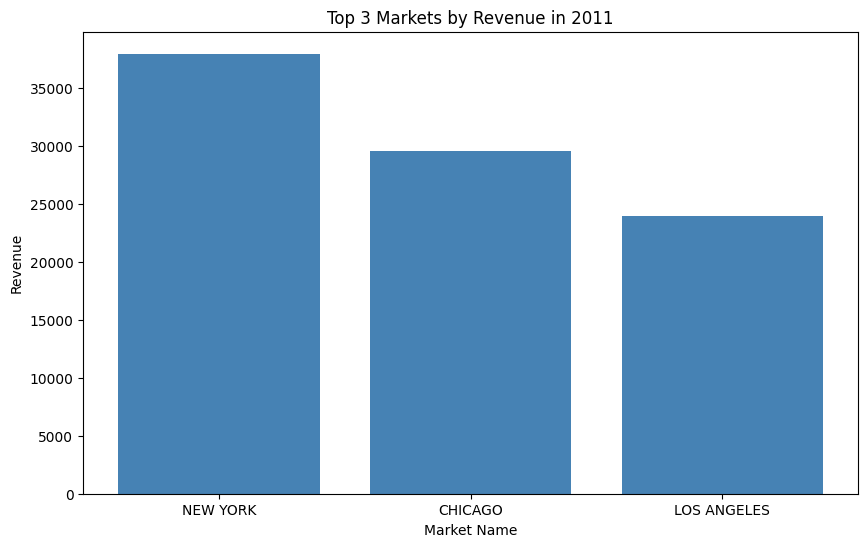

In [144]:
# Filter the DataFrame to only include 2011 data
year_2011_df = pepsico_df[
    (pepsico_df['Calendar week starting on'].dt.year == 2011) |
    (pepsico_df['Calendar week ending on'].dt.year == 2011)
]

# Calculate total volume and revenue for PepsiCo in 2011
total_volume = round(year_2011_df['UNITS'].sum(), 0)
total_revenue = round(year_2011_df['DOLLARS'].sum(), 0)

# Find the top 3 regions by revenue and round the values
top_3_regions_df = year_2011_df.groupby('Market_Name')['DOLLARS'].sum().nlargest(3).round(0)

print("Total Volume:", total_volume)
print("Total Revenue:", total_revenue)

# Create a bar chart for the top 3 markets
plt.figure(figsize=(10, 6))
plt.bar(top_3_regions_df.index, top_3_regions_df.values, color="steelblue")
plt.xlabel('Market Name')
plt.ylabel('Revenue')
plt.title('Top 3 Markets by Revenue in 2011')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### Pepsico Inc has a market share of 16.19%. This market share is strong compared to the number of companies in the market.

/var/folders/5f/06bzwqjd1kl3lkb5zlxrzcp00000gn/T/ipykernel_74660/252681635.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_4_vendors = top_4_vendors.append(others_row, ignore_index=True)


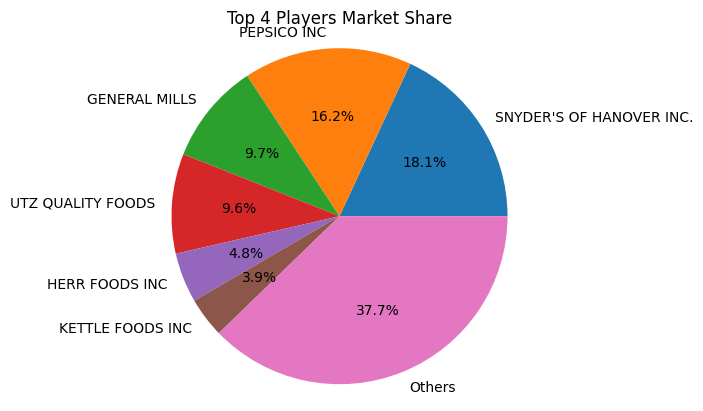

In [145]:
# Calculate the total revenue for all vendors
total_revenue = df["DOLLARS"].sum()

# Group the data by vendor and sum their revenue
vendor_revenue = df.groupby("L3")["DOLLARS"].sum().reset_index()

# Sort the vendors by their revenue in descending order
vendor_revenue = vendor_revenue.sort_values("DOLLARS", ascending=False)

# Calculate market share for each vendor
vendor_revenue["market_share"] = vendor_revenue["DOLLARS"] / total_revenue

# Export to CSV
vendor_revenue.to_csv('../data/output/vendor_revenue.csv', index=False)

# Take the top 4 vendors and the rest as "others"
top_4_vendors = vendor_revenue.iloc[:6].copy()
rest_vendors = vendor_revenue.iloc[6:].copy()

# Sum the market shares of the rest of the vendors
others_market_share = rest_vendors["market_share"].sum()

# Add a new row for "others"
others_row = pd.DataFrame({"L3": ["Others"], "DOLLARS": [0], "market_share": [others_market_share]})
top_4_vendors = top_4_vendors.append(others_row, ignore_index=True)

# Create a pie chart
plt.pie(top_4_vendors["market_share"], labels=top_4_vendors["L3"], autopct="%1.1f%%")
plt.title("Top 4 Players Market Share")
plt.axis("equal")
plt.show()


In [146]:
# Filter for the New York area
ny_df = df[df['Market_Name'] == 'NEW YORK']
ny_pepsico_df = df[(df['Market_Name'] == 'NEW YORK') & (df['L3'] == 'PEPSICO INC')]

In [147]:
ny_df.dtypes

IRI_KEY                                                                                      int64
WEEK                                                                                         int64
VEND                                                                                         int64
ITEM                                                                                         int64
UNITS                                                                                        int64
DOLLARS                                                                                    float64
F                                                                                           object
D                                                                                            int64
PR                                                                                           int64
Market_Name                                                                                 object
MskdName  

In [148]:
ny_pepsico_df.dtypes

IRI_KEY                                                                                      int64
WEEK                                                                                         int64
VEND                                                                                         int64
ITEM                                                                                         int64
UNITS                                                                                        int64
DOLLARS                                                                                    float64
F                                                                                           object
D                                                                                            int64
PR                                                                                           int64
Market_Name                                                                                 object
MskdName  

In [149]:
# Export to CSV
ny_df.to_csv('../data/output/ny_df.csv', index=False)
ny_pepsico_df.to_csv('../data/output/ny_pepsico_df.csv', index=False)

### The top three customers are Chain98, 112 and 110 with roughly 650k total units sold and 1.5 million $ in accumulated revenue.

            DOLLARS   UNITS
MskdName                   
Chain98   765851.22  227075
Chain112  672912.55  221869
Chain5    539660.61  179914
Chain73   248749.40   85924
Chain110  240666.00  190804


/var/folders/5f/06bzwqjd1kl3lkb5zlxrzcp00000gn/T/ipykernel_74660/359017648.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ny_pepsico_top_customers_df.index, rotation=45, ha='right')


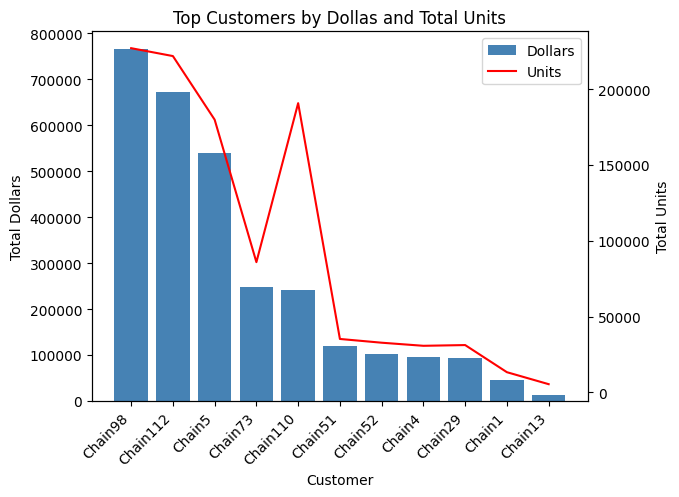

In [150]:
# Group by MskdName and sum UNITS and DOLLARS columns
ny_pepsico_customers_df = ny_pepsico_df.groupby('MskdName').agg({'DOLLARS': 'sum', 'UNITS': 'sum'})

# Sort by UNITS column in descending order
ny_pepsico_top_customers_df = ny_pepsico_customers_df.sort_values('DOLLARS', ascending=False)

print(ny_pepsico_top_customers_df.head())

# Create a bar chart to visualize the top customers
fig, ax1 = plt.subplots()

# Plot the total units
ax1.bar(ny_pepsico_top_customers_df.index, ny_pepsico_top_customers_df['DOLLARS'], label='Dollars', color='steelblue')

# Create a second y-axis to plot the total dollars
ax2 = ax1.twinx()
ax2.plot(ny_pepsico_top_customers_df.index, ny_pepsico_top_customers_df['UNITS'], label='Units', color='r', linestyle='-')

# Set the x-axis labels and rotate them for better readability
ax1.set_xticklabels(ny_pepsico_top_customers_df.index, rotation=45, ha='right')

# Add labels, title, and legend
ax1.set_xlabel('Customer')
ax1.set_ylabel('Total Dollars')
ax2.set_ylabel('Total Units')
plt.title('Top Customers by Dollas and Total Units')
fig.legend(loc="upper right", bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

# Show the chart
plt.show()

### The highest sold items in the NY market are 5160, 8006, and 60100 with roughly 600k units sold and 1.8 million $ in accumulated revenue. 

                 UPC         PRODUCT TYPE    DOLLARS   UNITS
0  00-01-28400-05160        TORTILLA CHIP  720272.27  222771
1  00-01-15665-77045  RICE AND CORN SNACK  639490.01  104026
2  00-03-41262-27213  ASTSS SALTED SNACKS  592880.82   93902


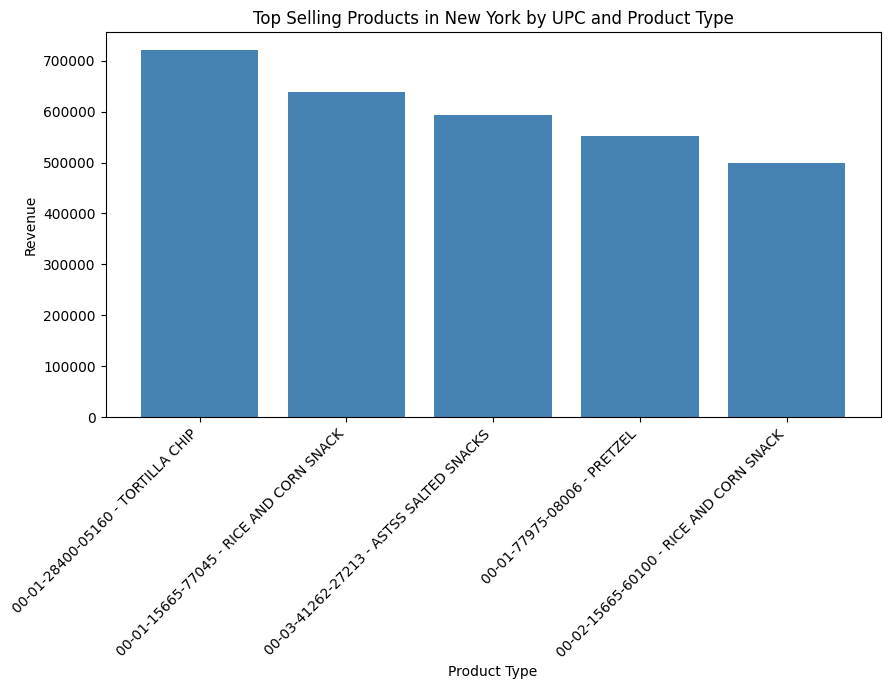

In [151]:
# Group by UPC and PRODUCT TYPE, and sum UNITS and DOLLARS columns
ny_products_df = ny_df.groupby(['UPC', 'PRODUCT TYPE']).agg({'DOLLARS': 'sum', 'UNITS': 'sum'})

# Reset the index and drop the old index column
ny_products_df = ny_products_df.reset_index()

# Sort by UNITS column in descending order and limit to top 10 items
ny_top_products_df = ny_products_df.sort_values('DOLLARS', ascending=False).head(5)

# Reset the index of ny_top_products_df and drop the old index column
ny_top_products_df = ny_top_products_df.reset_index(drop=True)

print(ny_top_products_df.head(3))

# Create a bar chart with matplotlib
fig, ax = plt.subplots(figsize=(10, 5))

bar_width = 0.8
bar_positions = list(range(len(ny_top_products_df)))
bar_labels = ny_top_products_df.apply(lambda x: f"{x['UPC']} - {x['PRODUCT TYPE']}", axis=1)

ax.bar(bar_positions, ny_top_products_df['DOLLARS'], width=bar_width, align='center', color='steelblue')

# Add labels and title
ax.set_xlabel('Product Type')
ax.set_ylabel('Revenue')
ax.set_title('Top Selling Products in New York by UPC and Product Type')

# Set the x-axis ticks and labels
ax.set_xticks(bar_positions)
ax.set_xticklabels(bar_labels, rotation=45, ha='right')

# Show the chart
plt.show()

### The promotional activity for the top 3 items on average is 38% which is 1/3 of all Pepsico sales in the NY market.

UPC
00-01-15665-77045    23.0
00-03-41262-27213    37.0
00-01-28400-05160    49.0
Name: PR, dtype: float64


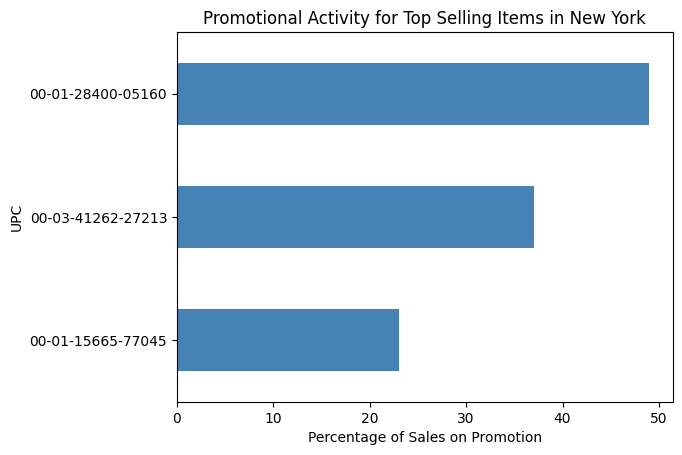

In [152]:
# Get the top 1-3 products
ny_top_3_products_df = ny_top_products_df.head(3)['UPC']

# Filter for the top 1-3 products
top_products_df = ny_df[ny_df['UPC'].isin(ny_top_3_products_df)]

# Calculate the mean promotional activity for each item
ny_promo_pct_df = top_products_df.groupby('UPC')['PR'].mean()
ny_promo_pct_df = ny_promo_pct_df.sort_values(ascending=True)

# Multiply by 100 and round to the nearest integer
ny_promo_pct_df = (ny_promo_pct_df * 100).round()

print(ny_promo_pct_df)

# Create a horizontal bar chart to visualize promotional activity for top products
fig, ax = plt.subplots()

# Plot the promotional activity for each item
ny_promo_pct_df.plot.barh(ax=ax, color="steelblue")

# Set the x-axis label
ax.set_xlabel('Percentage of Sales on Promotion')

# Add a title and show the chart
plt.title('Promotional Activity for Top Selling Items in New York')
plt.show()


### 14% of all Pepsico sales are made on the basis of a deal (~ 185k units).

Volume Sold on Deal (VSoD): 184197


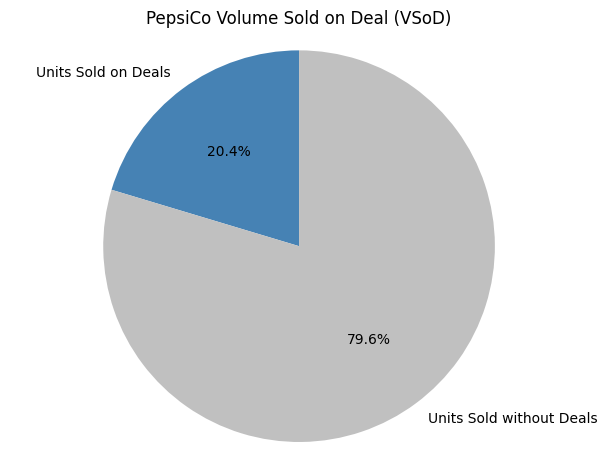

In [153]:
# Filter for PepsiCo products
pepsico_df = ny_df[ny_df["L3"] == "PEPSICO INC"]

# Filter for products sold on a deal and not on a deal
pepsico_deals_df = pepsico_df[pepsico_df["D"] == 1]
pepsico_no_deals_df = pepsico_df[pepsico_df["D"] == 0]

# Calculate VSoD and total units
vsod = pepsico_deals_df['UNITS'].sum()
units_no_deals = pepsico_no_deals_df['UNITS'].sum()

# Print VSoD
print('Volume Sold on Deal (VSoD):', vsod)

# Pie chart visualization
labels = ['Units Sold on Deals', 'Units Sold without Deals']
sizes = [vsod, units_no_deals]
colors = ['steelblue','silver']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.title("PepsiCo Volume Sold on Deal (VSoD)")
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [154]:
# Highlighting all sold products to choose from
ny_pepsico_products_df = ny_pepsico_df.groupby('UPC')['UNITS'].sum()
ny_pepsico_products_df = ny_pepsico_products_df.sort_values(ascending=False)

# Reset the index and set column names
ny_pepsico_products_df.columns = ['UPC', 'UNITS']

ny_pepsico_products_df.head(10)

UPC
00-01-28400-05160    222771
00-01-28400-02333    169277
00-02-28400-01109    108269
00-01-28400-01775     68823
00-01-28400-00227     44547
00-01-28400-05181     35967
00-01-28400-05011     32357
00-01-28400-04739     30133
00-01-28400-05179     28698
00-01-28400-04024     26967
Name: UNITS, dtype: int64

### Replace with desired UPC:

In [155]:
upc = '00-01-28400-05160'  # replace with the item you want

In [156]:
# Highlighting all vendors to choose from
ny_pepsico_retailers_df = ny_pepsico_df[(ny_pepsico_df['UPC'] == upc)]
ny_pepsico_retailers_df = ny_pepsico_retailers_df.groupby('MskdName')['UNITS'].sum()
ny_pepsico_retailers_df = ny_pepsico_retailers_df.sort_values(ascending=False)

# Reset the index and set column names
ny_pepsico_retailers_df.columns = ['MskdName', 'UNITS']

ny_pepsico_retailers_df.head(10)

MskdName
Chain112    53971
Chain98     51975
Chain5      44475
Chain110    15138
Chain73     13366
Chain51     12650
Chain29      8996
Chain4       8402
Chain52      7014
Chain1       5628
Name: UNITS, dtype: int64

### Replace with desired Retailer:

In [157]:
retailer = "Chain112"   # replace with the chain you want

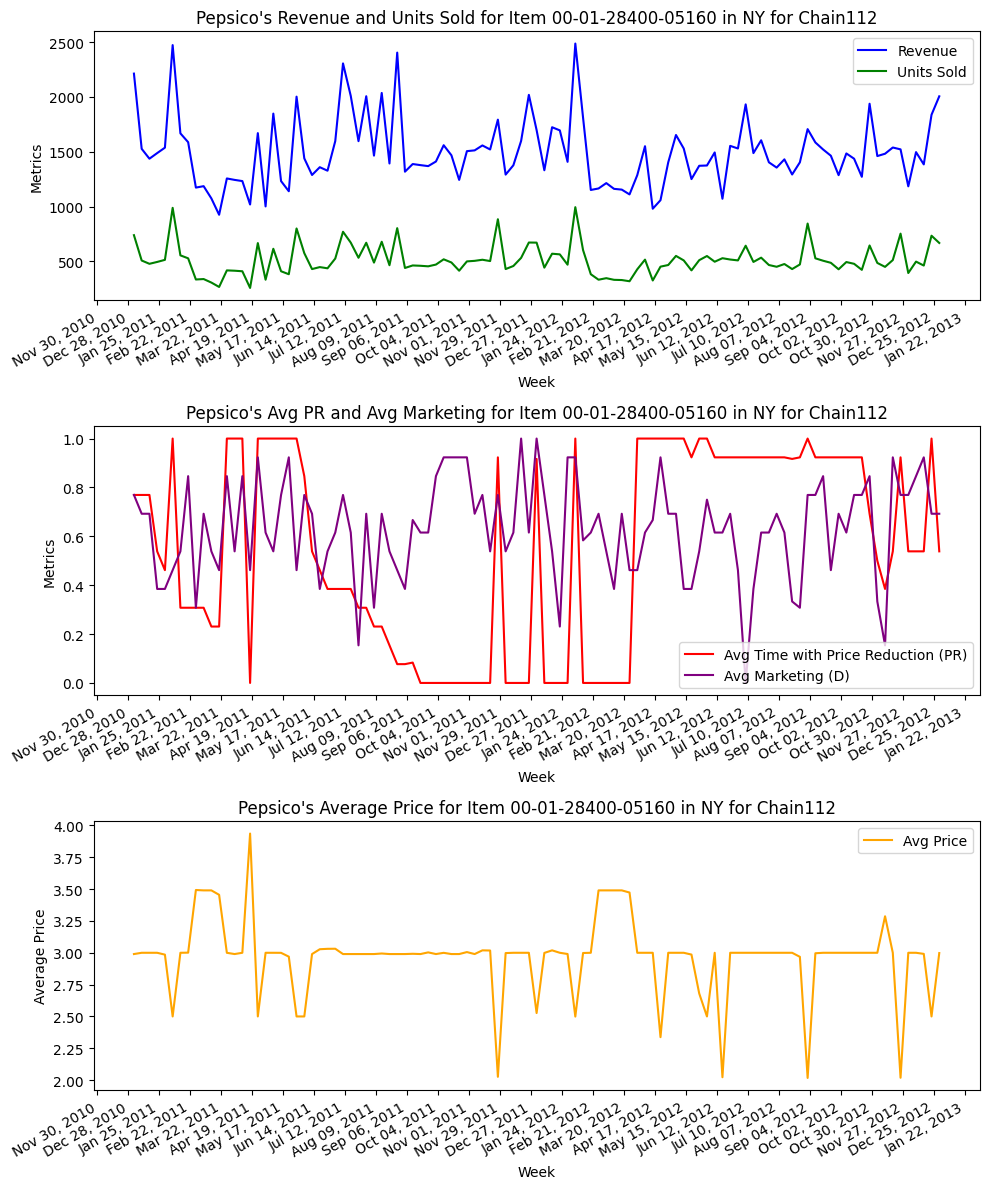

In [158]:
# Filter the dataframe by item and New York area
ny_pepsico_item_df = ny_pepsico_df[(ny_pepsico_df['MskdName'] == retailer) & (ny_pepsico_df['UPC'] == upc)]

# Group the data by week and calculate the metrics
ny_pepsico_item_weekly_df = ny_pepsico_item_df.groupby('Calendar week starting on').agg(
    {'DOLLARS': 'sum', 'UNITS': 'sum', 'PR': 'mean', 'D': 'mean'}
)
ny_pepsico_item_weekly_df.columns = ['Revenue', 'Units Sold', 'Avg PR', 'Avg Marketing']

# Calculate the average price
ny_pepsico_item_weekly_df['Avg Price'] = ny_pepsico_item_weekly_df['Revenue'] / ny_pepsico_item_weekly_df['Units Sold']

# Resample the data to weekly frequency
ny_pepsico_item_weekly_df = ny_pepsico_item_weekly_df.resample('W').sum()

# Export to CSV
ny_pepsico_item_weekly_df.to_csv('../data/output/ny_pepsico_item_weekly_df.csv', index=False)

# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

# Set up the x-axis tick formatting
week_locator = mdates.WeekdayLocator(interval=4)  # Ticks every 4 weeks
week_fmt = mdates.DateFormatter('%b %d, %Y')  # Format: "Month day, year"

# Plot the time series for revenue and units sold
ax1.plot(ny_pepsico_item_weekly_df.index, ny_pepsico_item_weekly_df['Revenue'], label='Revenue', color='blue')
ax1.plot(ny_pepsico_item_weekly_df.index, ny_pepsico_item_weekly_df['Units Sold'], label='Units Sold', color='green')
ax1.set_xlabel('Week')
ax1.set_ylabel('Metrics')
ax1.set_title(f"Pepsico's Revenue and Units Sold for Item {upc} in NY for {retailer}")
ax1.legend()

# Set x-axis tick formatting for ax1
ax1.xaxis.set_major_locator(week_locator)
ax1.xaxis.set_major_formatter(week_fmt)

# Plot the time series for average PR and average marketing support
ax2.plot(ny_pepsico_item_weekly_df.index, ny_pepsico_item_weekly_df['Avg PR'], label='Avg Time with Price Reduction (PR)', color='red')
ax2.plot(ny_pepsico_item_weekly_df.index, ny_pepsico_item_weekly_df['Avg Marketing'], label='Avg Marketing (D)', color='purple')
ax2.set_xlabel('Week')
ax2.set_ylabel('Metrics')
ax2.set_title(f"Pepsico's Avg PR and Avg Marketing for Item {upc} in NY for {retailer}")
ax2.legend()

# Set x-axis tick formatting for ax2
ax2.xaxis.set_major_locator(week_locator)
ax2.xaxis.set_major_formatter(week_fmt)

# Plot the time series for average price
ax3.plot(ny_pepsico_item_weekly_df.index, ny_pepsico_item_weekly_df['Avg Price'], label='Avg Price', color='orange')
ax3.set_xlabel('Week')
ax3.set_ylabel('Average Price')
ax3.set_title(f"Pepsico's Average Price for Item {upc} in NY for {retailer}")
ax3.legend()

# Set x-axis tick formatting for ax3
ax3.xaxis.set_major_locator(week_locator)
ax3.xaxis.set_major_formatter(week_fmt)

# Rotate the x-axis tick labels and adjust the layout
plt.setp(ax1.get_xticklabels(), rotation=30, ha='right')
plt.setp(ax2.get_xticklabels(), rotation=30, ha='right')
plt.setp(ax3.get_xticklabels(), rotation=30, ha='right')
plt.tight_layout()
plt.show()